# Fitting and evaluating the performance of a multiclass classifier

The wine data set consists of 13 different parameters of wine such as alcohol and ash content which was measured for 178 wine samples. These wines were grown in the same region in Italy but derived from three different cultivars; therefore there are three different classes of wine. The goal here is to find a model that can predict the class of wine given the 13 measured parameters and find out the major differences among the three different classes. This is a classification problem and here I will describe four models and asses the accuracy of each model. Furthermore, I will use principal component analysis to identify and explore the differences among the three classes.

For more information on this dataset, see [here](od280/od315_of_diluted_winesod280/od315_of_diluted_wines).

In this example, we will predict the 'class' variable using the other 12 variables as predictors (aka input).

## Import modules that we will use

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## To ensure reproducability, set a seed value

In [2]:
random_seed = 1
np.random.seed(random_seed)

## Load conduct an initial evaluation and cleaning of the data

In [3]:
wine_df = pd.read_csv("../../Data/wine.csv")

In [4]:
wine_df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
wine_df.columns

Index(['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [6]:
wine_df.columns = [s.strip().lower().replace(' ', '_') for s in wine_df.columns]

In [7]:
wine_df.columns

Index(['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [8]:
wine_df.columns = ['od' if item == 'od280/od315_of_diluted_wines' else item for item in wine_df.columns]

wine_df.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
wine_df.isnull().sum()

class                   0
alcohol                 0
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
od                      0
proline                 0
dtype: int64

## Prepare train and test partitions

Split the dataframe into X and y

In [10]:
y = wine_df.pop('class') # be careful with this, after the pop the wine_df will have this column missing (which isn't a problem for our analysis here)
X = wine_df

Split the data into train and test partitions

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Since we are prepping the data for fnn, we need to rescale the input (X) to a common scale. In this case, we are using the standard scaler which standardizes the variables. 

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Train and fit out knn model and use the model to generate predictions for y_test.

In [13]:
knn = KNeighborsClassifier(n_neighbors = int(len(y_train)**(1/2)), metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

For the next set of cells, we will measure the performance of the model using variable metrics that we are familiar with, but now for a multiclass problem.

In [14]:
confusion_matrix(y_test, y_pred)

array([[23,  0,  0],
       [ 1, 18,  0],
       [ 0,  0, 12]])

In [15]:
accuracy_score(y_test, y_pred)

0.9814814814814815

In [16]:
precision_score(y_test, y_pred, average=None)

array([0.95833333, 1.        , 1.        ])

In [17]:
precision_score(y_test, y_pred, average='micro')

0.9814814814814815

In [18]:
precision_score(y_test, y_pred, average='macro')

0.9861111111111112

In [19]:
precision_score(y_test, y_pred, average='weighted')

0.9822530864197532

In [20]:
recall_score(y_test, y_pred, average=None)

array([1.        , 0.94736842, 1.        ])

In [21]:
recall_score(y_test, y_pred, average='micro')

0.9814814814814815

In [22]:
recall_score(y_test, y_pred, average='macro')

0.9824561403508771

In [23]:
recall_score(y_test, y_pred, average='weighted')

0.9814814814814815

In [24]:
f1_score(y_test, y_pred, average=None)

array([0.9787234 , 0.97297297, 1.        ])

In [25]:
f1_score(y_test, y_pred, average='micro')

0.9814814814814815

In [26]:
f1_score(y_test, y_pred, average='macro')

0.9838987924094308

In [27]:
f1_score(y_test, y_pred, average='weighted')

0.9814282367473858

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [29]:
avg_method = 'macro'
results = []
for avg_method in ['micro', 'macro', 'weighted']:
    for k in range(1,int(len(y_test)**0.5)*2,2): #  k values from 1 to root of n
        knn = KNeighborsClassifier(n_neighbors=k,  metric='euclidean')
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        results.append({ 
                'avg_method': avg_method,
                'k':k,
                'accuracy': accuracy_score(y_test, y_pred),
                'precision': precision_score(y_test, y_pred, average=avg_method, zero_division=0),
                'recall':recall_score(y_test, y_pred, average=avg_method),
                'f1': f1_score(y_test, y_pred, average=avg_method),
        })

In [30]:
results_df = pd.DataFrame(results)  
results_df

,avg_method,k,accuracy,precision,recall,f1
0,micro,1,0.981481,0.981481,0.981481,0.981481
1,micro,3,0.981481,0.981481,0.981481,0.981481
2,micro,5,0.981481,0.981481,0.981481,0.981481
3,micro,7,0.981481,0.981481,0.981481,0.981481
4,micro,9,0.981481,0.981481,0.981481,0.981481
5,micro,11,0.981481,0.981481,0.981481,0.981481
6,micro,13,0.981481,0.981481,0.981481,0.981481
7,macro,1,0.981481,0.986111,0.982456,0.983899
8,macro,3,0.981481,0.986111,0.982456,0.983899
9,macro,5,0.981481,0.986111,0.982456,0.983899


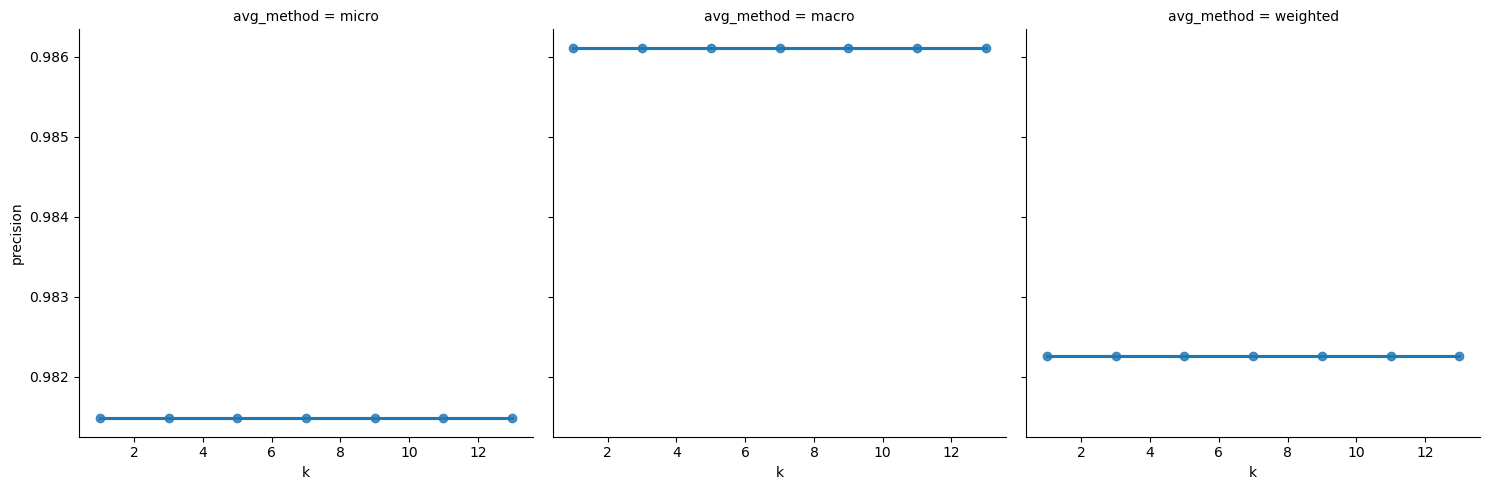

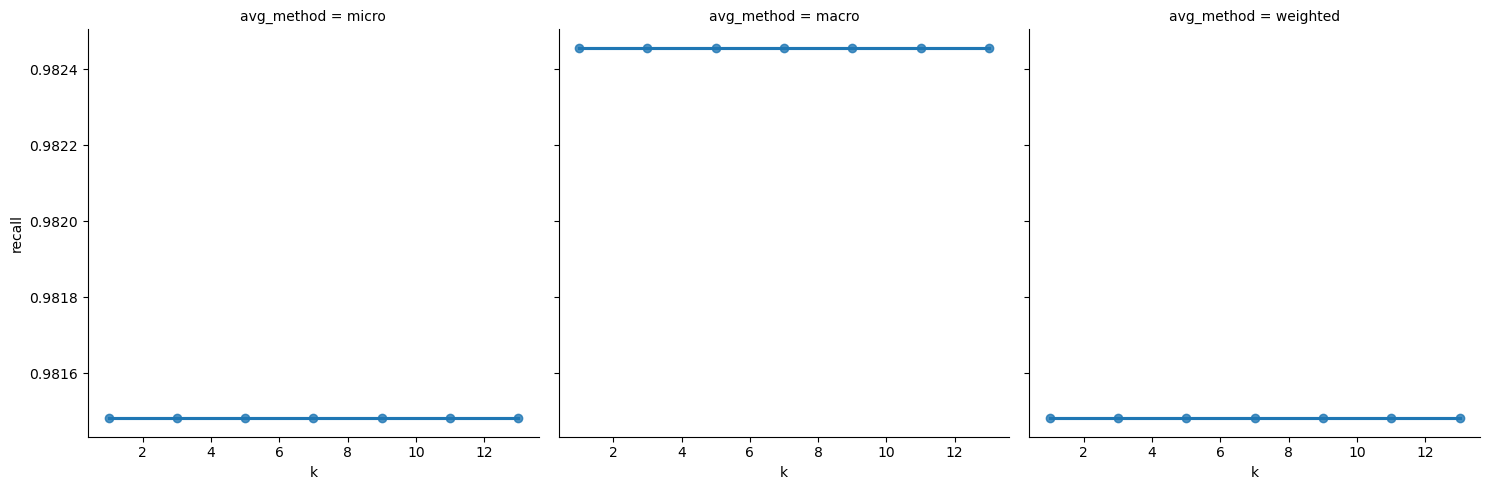

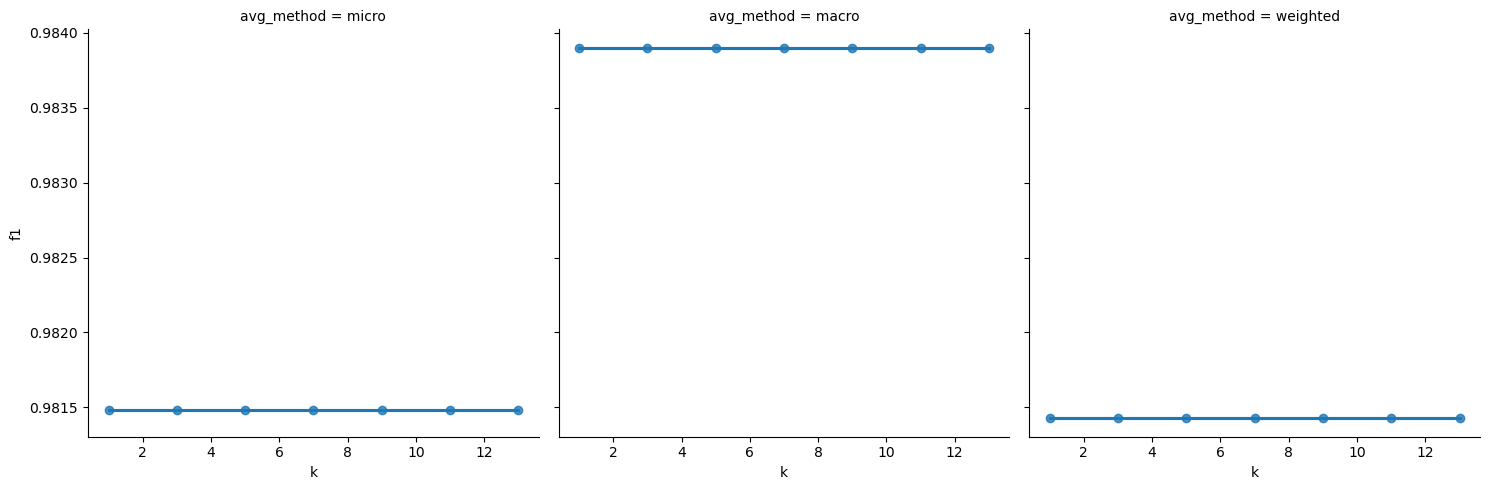

In [31]:
import seaborn as sns

sns.lmplot(x='k', y='precision', col='avg_method',data=results_df)
sns.lmplot(x='k', y='recall', col='avg_method',data=results_df)
sns.lmplot(x='k', y='f1', col='avg_method',data=results_df)

In [32]:
len(X_test)

54

In [33]:
int(len(X_test)**(1/2))

7

Based on our evaluation, the scoring metrics are equal for all values of k from 1 through 2 * root N. Using the root n rule of thumb (that balances between overfitting and underfitting), the best of these k values would be 7.